### Employee Exit Surveys Project

In this project I´m going to be analyzing the "Department of Education, Training and Employment (DETE)" and the "Technical and Further Education (TAFE)" data sets to answer questions about reasons of resigning in employees comparing their age or time in the job.  

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey["Disability"].value_counts()

Yes    23
Name: Disability, dtype: int64

The columns with the most nulls in the DETE data set(Aboriginal, Disability, Torres Strait, etc) have kind boolean data type were the non null values are always "yes" 

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Erasing columns that are not usefull for answering the questions asked by the stakeholder

In [9]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Renaming columns in the DETE data set

In [10]:
def clean_columns(data_set):
    data_set.columns = data_set.columns.str.lower().str.strip().str.replace(r"\s", "_")
    return data_set.columns

In [11]:
dete_survey_updated.columns = clean_columns(dete_survey_updated)

In [12]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Renaming columns in the TAFE data set

In [13]:
column_dict = {"Record ID":"id", "CESSATION YEAR":"cease_date", 
               "Reason for ceasing employment":"separationtype",
                "Gender. What is your Gender?":"gender",
                "CurrentAge. Current Age":"age", 
               "Employment Type. Employment Type":"employment_status",
              "Classification. Classification":"position",
              "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service",
              "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service"}
tafe_survey_updated.rename(columns=column_dict, inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Selecting only the rows in each data set that the way of leaving the job is due to resignation. The DETE data set contains diferent resignation, so they are all included 

In [14]:
def resignation(serie):
    return serie.str.contains("Resignation")

In [15]:
dete_resignation = dete_survey_updated.loc[resignation(dete_survey_updated["separationtype"]), :].copy()
dete_resignation["separationtype"].value_counts(dropna=False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [16]:
tafe_resignation = tafe_survey_updated.loc[tafe_survey_updated["separationtype"] == "Resignation", :].copy()
tafe_resignation["separationtype"].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

Searching for inconsistencies in dates of the data set

In [17]:
dete_resignation["cease_date"] = dete_resignation["cease_date"].str.split("/").str[-1].astype("float")
dete_resignation["cease_date"].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

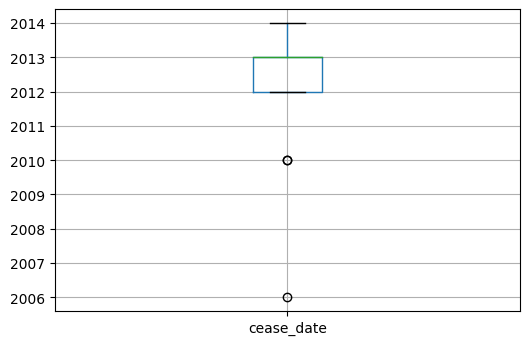

In [18]:
boxplot = dete_resignation.boxplot(column="cease_date")
boxplot

DETE cease_date column is between 2013 and 2010 and the start_date column is between 2013 and 1963

In [19]:
tafe_resignation["cease_date"].value_counts(dropna=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64

TAFE cease_date column is between 2013 and 2009

Creating a column institute_service in the DETE data set by substracting the resignation year with the start year to match the column with the same name in the TAFE data set

In [20]:
dete_resignation["institute_service"] = dete_resignation["cease_date"] - dete_resignation["dete_start_date"]
dete_resignation["institute_service"].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

First, changing the data types of the columns that describe job dissatisfaction in both data sets to boolean. Then, creating a new column "dissatisfaction" that see if any of the columns selected as a dissatisfaction indicator is True and setting its value to True as well

In [21]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    else:
        return value != "-"

In [22]:
tafe_resignation[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]] = tafe_resignation[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals)
tafe_resignation["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

Creating a "dissatisfied" column in both data sets that represent if any of the selected column has a True value in each row

In [24]:
tafe_resignation["dissatisfied"] = tafe_resignation[["Contributing Factors. Dissatisfaction", 
                                                     "Contributing Factors. Job Dissatisfaction"]].any(axis=1, skipna=False)
tafe_resignation_up = tafe_resignation.copy()
tafe_resignation_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [30]:
columns_of_dissatisfaction = ["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment",
                             "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions",
                             "work_life_balance", "workload"]
dete_resignation["dissatisfied"] = dete_resignation[columns_of_dissatisfaction].any(axis=1, skipna=False)
dete_resignation_up = dete_resignation.copy()
dete_resignation["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Adding a column with the name of the data set to identify de data when combined

In [31]:
dete_resignation_up["institute"] = "DETE"
tafe_resignation_up["institute"] = "TAFE"

Concatenating both data sets

In [34]:
combined = pd.concat([dete_resignation_up, tafe_resignation_up], ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

Dropping columns with less than 500 NON NULL VALUES

In [35]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.columns

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute'],
      dtype='object')

Cleaning the "institute_service" column

In [38]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


Extracting the numeric values of the "institute_service" column

In [49]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")[0].astype("float")
combined_updated["institute_service"].value_counts()

<ipython-input-49-6966aa021d4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated["institute_service"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")[0].astype("float")


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

Creating a funtion to categorize according to the years of service 

In [50]:
def years_category(value):
    if pd.isnull(value):
        return np.nan
    elif value < 3:
        return "New"
    elif 3 <= value <= 6:
        return "Experienced"
    elif 7 <= value <= 10:
        return "Established"
    else:
        return "Veteran"

In [52]:
combined_fin = combined_updated.copy()
combined_fin["service_cat"] = combined_updated["institute_service"].apply(years_category)
combined_fin["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [53]:
combined_fin["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Most common value is False, so Im going to replace the Null values with False in the "dissatisfied" column

In [54]:
combined_fin["dissatisfied"].fillna(value=False, inplace=True)
combined_fin["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

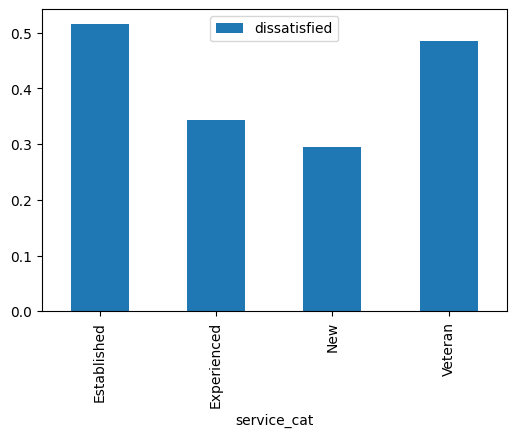

In [55]:
porcen_diss = combined_fin.pivot_table(values="dissatisfied", index="service_cat")
porcen_diss.plot(kind="bar")

### Observations 

Its clear that the more years the person is in the institution is more likely to be dissatisfied, but this applies from new to established. Then, when the employeee falls in the veteran category, the dissatisfaction reduces a bit